## Problem Metadata 
DO NOT DELETE. This is a JSON Block. The metadata and course context MUST be in the first cell. 

```json
{
    "problem_title": "humphreyIdealCycle",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Gas Power Cycles",
    "lecture_reference": {
        "lecture_id": "",
        "subtopics": [
            {
                "key": "",
                "topic": ""
            }
        ]
    },
    "book_reference": {
        "chapter_number": 9,
        "title": "Gas Power Cycles",
        "sections": [
            "Brayton Cycle: the Ideal Cycle for Gas-Turbine Engines"
        ]
    },
    "notes": "."
}

## 1. Problem Statement

The ideal Humphrey cycle uses air as the working fluid, assumed to be an ideal gas, and consists of the following steps:
* reversible, adiabatic compression of an incoming gas
* constant-volume heat addition
* reversible, adiabatic expansion of the gas; and
* constant-pressure heat rejection

The gas enters the compressor at $T_1=$26.85$^\circ$C and $p_1=$0.1 MPa and exits at $p_2=$ 1 MPa. The compressor operates with an isentropic efficiency of 90%. After constant volume heat addition, the gas is at $T_3=$726.85$^\circ$C where it then enters the turbine. It then exits the turbine at a pressure $p_4=$0.1 MPa. The turbine operates with an isentropic effiency of 100%.

**Goal:** Determine:
- How much heat is transferred in per mass, $q_\text{in}$?
- What is the net work per mass, $w_\text{net}$?
- What is the thermal efficiency of this cycle? 

## 2. Schematic 

Draw a schematic that shows a compressor, connected to a detonation chamber, connected to a turbine, which is connected to a heat exchanger. Label the inlet and outlet of the compressor as state 1 and 2, respectively. Label the inlet and outlet of the turbine as state 3 and 4, respectively.  

## 3. Assumptions and Approximations
### A. General (Cycle-Wide) Assumptions
1.  **Steady-State/Steady-Flow:** For each device in the cycle ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
2.  **Cold-Air-Standard Assumption**
    * Working fluid is air, which circulates in a closed loop and behaves as an ideal gas.
    * All processes are internally reversible.
    * Combustion processes are replaced by heat-addition processes from an external source.
    * Exhaust processes are replaced by a heat-rejection process, restoring the working fluid to its initial state.
    * Air has constant specific heats whose values are determined at room temperature.
3.  **Overall Energy:** All changes in **Kinetic Energy ($\Delta KE$) and Potential Energy ($\Delta PE$)** are negligible between components, except where explicitly calculated (e.g., for a nozzle or diffuser).
4.  ***Property Model and Analysis Method:*** **(The chosen Specific Heat Implementation)**
    * **Approach: Constant Specific Heat Model (Simpler):**
        * **Fundamental Model:** The working fluid is modeled as an **Ideal Gas**.
        * **Purpose:** Used for quick, hand-calculable estimates.
        * **Specific Heats:** $c_p$ and $c_v$ are assumed to be **constant** (typically evaluated at $25^\circ \text{C}$).
        * **First Law:** Changes in energy are calculated using **$\Delta h = c_p \Delta T$** and **$\Delta u = c_v \Delta T$**.

    * **Alternative Approach: Variable Specific Heat Model (Accurate):**
        * **Purpose:** Used for increased accuracy by using temperature-dependent properties.
        * **Tools:** Properties ($h$, $s$, $T$, and $p$) are retrieved directly from a **thermodynamic property library** (e.g., **`pyCalor`**) based on the **Air model**.
        * **First Law:** Changes in energy are calculated using **$\Delta h = h_{\text{out}} - h_{\text{in}}$** and **$\Delta u = u_{\text{out}} - u_{\text{in}}$**.

---

### B. Component-Specific Assumptions

1.  **Conservation of Mass:** For all devices operating at steady-flow, the mass entering is equal to the mass exiting: **$\dot{m}_{\text{in}} = \dot{m}_{\text{out}}$**).
2.  **Conservation of Energy (First Law):** The **Steady-Flow Energy Equation** is applied to determine work and heat transfer.
3.  **Entropy Balance (Second Law):** The **Entropy Balance for a Control Volume Equation** is applied to determine changes in entropy.

#### 1-2. Compressor
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_C$)**.

#### 2-3. Detonation chamber / Heat Exchanger
* **Isochoric:** $\Delta v=0$ (constant volume heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 3-4. Turbine
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_T$)**.

#### 4-1. Exhaust
* Idealized as a **Heat Exchanger** rejecting heat out of the cycle
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

## 4. Physical Laws
### Control Volumes:
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out}$$
    
3.  **Entropy Balance (Second Law for a Control Volume):**
    $$\frac{dS_\text{CV}}{dt} = \dot{S}_\text{in} - \dot{S}_\text{out} + \dot{S}_\text{gen}$$

### Steady-Flow Analysis
Since each devices operates as a **Steady-Flow** device we can write: 

**Mass Balance:**
$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

**Energy Balance:**
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} + \frac{w_\text{in}^2}{2} + g z_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} + \frac{w_\text{out}^2}{2} + g z_\text{out} \right)$$

Neglecting kinetic and potential energy effects:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} \right)$$

**Entropy Balance:**
$$\dot{S}_\text{gen} = \dot{S}_\text{out} - \dot{S}_\text{in}$$

Assuming that the process is adiabatic and reversible (isentropic), we have:
$$\dot{S}_\text{out} = \dot{S}_\text{in}$$

and

$$\dot{m}_\text{out}s_\text{out} = \dot{m}_\text{in}s_\text{in}$$

Therefore,

$$s_\text{in} = s_\text{out}$$

### Device Governing Equations (First Law)
For the detonation chamber (2-3):
$$\dot{Q}_\text{in} = \dot{m} \left(u_3 - u_2 \right)$$

For the cold heat exchanger (Exhaust, 4-1):
$$\dot{Q}_\text{out} = \dot{m} \left(h_4 - h_1 \right)$$

### Performance Metrics (Actual Cycle)
The actual thermal efficiency is defined as:
$$\eta_\text{th} = \frac{\dot{Q}_\text{net,in}}{\dot{Q}_\text{in}} = 1 - \frac{\dot{Q}_\text{out}}{\dot{Q}_\text{in}} $$

### Ideal Gas Simplifications (First Law, Constant $c_p$)

Under the **Constant Specific Heat Model**, we use $\Delta h = c_p \Delta T$:
$$\dot{Q}_\text{in} = \dot{m} c_v\left(T_3 - T_2 \right)$$
$$\dot{Q}_\text{out} = \dot{m}c_p \left(T_4 - T_1 \right)$$

### Ideal Isentropic Relations (Second Law)

To determine the actual exit states of the compressor and turbine, we need to first determine their isentropic states. Since the compressor and turbine operate as a **steady flow** devices, $\frac{dS_\text{CV}}{dt} = 0$. Since they operate with a single inlet and outlet, we have $\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$. For the ideal case, $\dot{S}_\text{gen} = 0$. Therefore, $s_{2s} = s_1$ and $s_{4s} = s_3$.  

Since the ideal compressor and turbine processes are isentropic ($ds = 0$), we use the **$Tds$ relations** (valid for Ideal Gas behavior):

$$ds = c_p \frac{dT}{T} - R \frac{dp}{p} $$

Setting $ds=0$, assuming the **Constant Specific Heat Model**, and integrating yields the isentropic pressure-temperature relation:
$$ T_{2s} = T_1 \left( \frac{p_2}{p_1}\right)^{(k-1)/k} = T_1 (r_p)^{(k-1)/k}$$
$$ T_{2s} = T_1 \left( \frac{v_1}{v_2}\right)^{(k-1)} $$

and for the turbine:
$$ T_{4s} = T_3 \left( \frac{p_4}{p_3}\right)^{(k-1)/k}$$
$$ T_{4s} = T_3 \left( \frac{v_3}{v_4}\right)^{(k-1)} $$

Recall that $v_2 = v_3$.

### Isentropic Efficiency (Linking Actual and Ideal States)

The efficiency definitions are used to determine the actual exit enthalpies ($h_{2a}$ and $h_{4a}$):

**Compressor Isentropic Efficiency:**
$$\eta_\text{compressor} = \frac{\text{Isentropic compressor work}}{\text{Actual compressor work}} = \frac{h_{2s} - h_1}{h_{2a} - h_1} $$

For an ideal gas this is:
$$\eta_\text{compressor} = \frac{T_{2s} - T_1}{T_{2a} - T_1} $$

**Turbine Isentropic Efficiency:**
$$\eta_\text{turbine} = \frac{\text{Actual turbine work}}{\text{Isentropic turbine work}} = \frac{h_{3} - h_{4a}}{h_{3} - h_{4s}} $$

For an ideal gas this is:
$$\eta_\text{turbine} = \frac{T_{3} - T_{4a}}{T_{3} - T_{4s}} $$

### Net Work Out

Since this is a cycle, we can define the specific net work out as:

$$\dot{W}_\text{net,out} = \dot{Q}_\text{in} - \dot{Q}_\text{out}$$

$$\dot{W}_\text{net,out} = \dot{m} \left( q_\text{in} - q_\text{out} \right)$$

or

$$w_\text{net,out} = q_\text{in} - q_\text{out} $$

### Thermal Efficiency

We can define the thermal efficiency for an engine as:

$$\eta_\text{th} = 1 - \frac{q_\text{out}}{q_\text{in}} $$

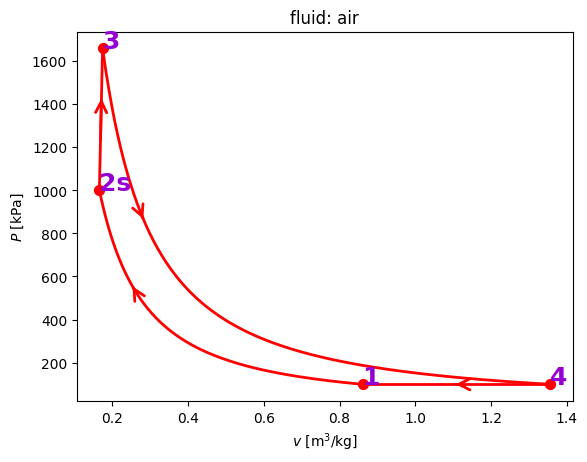

In [4]:
# 5. Properties (Code Cell)
!pip install pyCalor numpy matplotlib

from pyCalor import thermo as th

substance = 'air'

#state 1
T1_C = 26.85
p1_MPa = 0.1
st1 = th.state(substance,T=(T1_C,'C'),p=(p1_MPa,'Mpa'),name='1')

#state 2
p2_MPa = 1
st2s = th.state(substance,s=(st1.s),p=(p2_MPa,'Mpa'),name='2s')
eta_c = 0.9
h2a = st1.h + (st2s.h - st1.h)/eta_c
st2a = th.state(substance,h=(h2a),p=(p2_MPa,'Mpa'),name='2a')

#state 3
T3_C = 726.85
v3_m3PerKg = st2a.v
st3 = th.state(substance,v=(v3_m3PerKg),T=(T3_C,'C'),name='3')

#state 4
p4_MPa = 0.1
st4 = th.state(substance,s=st3.s,p=(p4_MPa,'Mpa'),name='4')

pr_a = th.process([(st1,st2a),(st2a,st3),(st3,st4),(st4,st1)]) #actual
pr_s = th.process([(st1,st2s),(st2s,st3),(st3,st4),(st4,st1)]) #isentropic
pr_s.plot("pv"); #p-v diagram for isentropic case

In [9]:
# 6 Calculations (Code Cell)
wInCompressor_kJperKg = st2a.h - st1.h
qIn_kJperKg = st3.u - st2a.u
wOutTurbine_kJperKg = st3.h - st4.h
qOut_kJperKg = st4.h - st1.h
wNetOut_kJperKg = qIn_kJperKg-qOut_kJperKg
wFlow_kJperKg = -wNetOut_kJperKg + wOutTurbine_kJperKg - wInCompressor_kJperKg #flow work
eta_th = wNetOut_kJperKg/qIn_kJperKg

print(f"(a) qIn_kJperKg: {qIn_kJperKg:.2f} kJ/kg")
print(f"(b) wNetOut_kJperKg: {wNetOut_kJperKg:.2f} kJ/kg")
print(f"(c) eta_th: {eta_th:.2%} [-]")

(a) qIn_kJperKg: 321.32 kJ/kg
(b) wNetOut_kJperKg: 146.52 kJ/kg
(c) eta_th: 45.60% [-]


## 7. Summary and Reasoning

The fundamental advantage of the Humphrey cycle over the Brayton cycle is that the heat addition is accompanied by an increase in pressure due to volumetric confinement.

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---